**Home work 6**

In this exercise we will perform cross-validation on a simulated data set.  (5 pts)      

In [11]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import seaborn as sns 
%matplotlib inline

(a) Follow the below steps and generate $y$ from $x$ and $\epsilon$.

* Using the random.normal() function, create a vector,  𝑥 , containing 100 observations drawn from a N(0, 1) distribution. 

* Using the random.normal() function, create a vector, $\epsilon$, containing 100 observations drawn from a N(0, 1) distribution i.e. a normal distribution with mean zero and variance 1.

* Using $x$ and $\epsilon$, generate a vector $y$ according to the model

$Y = x - 2x^2+ \epsilon$ 

In [12]:
np.random.seed(5)

x = np.random.normal(0,1,100)
eps = np.random.normal(0,1,100)
y = x - 2*x**2 + eps

(b) Plot the scatter plot between $x$ and $y$.

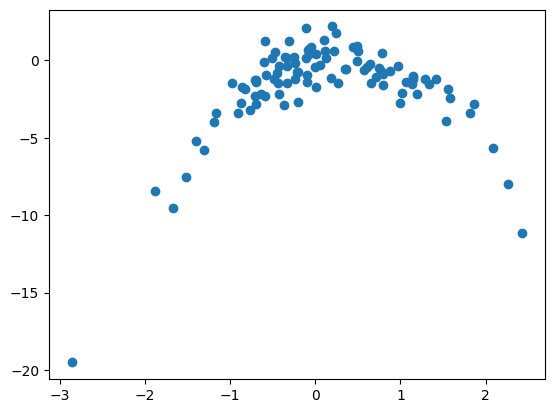

In [13]:
plt.scatter(x,y)
plt.show()

(c) Compute the Leave One Out Cross-Validation errors using Mean squared error (MSE) that result from fitting the following four models using least squares:

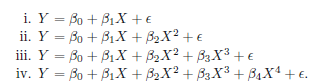

In [14]:
from sklearn.model_selection import cross_val_score

for power in range(1,5):
    poly = PolynomialFeatures(power,include_bias=False)
    X_poly = poly.fit_transform(x.reshape(-1, 1))

    # define Leave One Out Cross-Validation
    cv = LeaveOneOut()
    
    # create model
    model = LinearRegression(fit_intercept=True)
    model.fit(X_poly,y)

    # use function cross_val_score() to calculate the MSE
    scores = cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    average_MSE = np.mean(np.absolute(scores))
    print('When degree = {}, the Leave One Out Cross-Validation errors using MSE is: {}'.format(power,average_MSE))

When degree = 1, the Leave One Out Cross-Validation errors using MSE is: 9.325631261683954
When degree = 2, the Leave One Out Cross-Validation errors using MSE is: 1.1215025966769268
When degree = 3, the Leave One Out Cross-Validation errors using MSE is: 1.1737737984110717
When degree = 4, the Leave One Out Cross-Validation errors using MSE is: 2.2512936416513383


(d)  What is the model with the smallest LOOCV error

$\textbf{Answer:}$ When degree=2, the model have the smallest LOOCV error, the model is $Y = 0.0288 + 1.1562x - 2.0181x^2$

(e) Observe the statistical significance of the coefficient estimates that results from fitting each of the models above using
least squares.

In [15]:
for power in range(1,5):
    poly = PolynomialFeatures(power,include_bias=False)
    df = poly.fit_transform(pd.DataFrame({'X':x}))
    df = pd.DataFrame(df)
    col = ['X' + str(i) for i in range(1,power+1)]
    df.columns = col
    
    # insert intercept column into X
    ones = np.ones(100)
    df.insert(0,'intercept',ones)

    # create model
    X = sm.add_constant(df)
    model = sm.OLS(y,X).fit()
    print('When degree = {}'.format(power))
    print(model.summary())

When degree = 1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.660
Date:                Sun, 09 Oct 2022   Prob (F-statistic):             0.0333
Time:                        00:11:05   Log-Likelihood:                -246.77
No. Observations:                 100   AIC:                             497.5
Df Residuals:                      98   BIC:                             502.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.6926      0.290    

$\textbf{Answer}$: 
 - When degree=1, the p value of intercept and X1 is relatively low (<0.05), which are statistically significant, however, the efficacy of the model (AIC, BIC, R-squared, Adj. R-squared) is far from satisfying.
 - When degree=2,the efficacy of the model is good, the p value of X1 and X2 is 0.000 which means they are statistically significant to y, X1 and X2 also has low std err and a large absolute value of t, which shows the coefficient $\beta_1$ and $\beta_2$ is not likely equal to zero. Conversely, the intercept't t value is close to 0 and p value is close to 1 (which means the intercept $\beta_0$ is more likely to equal to 0). 
  - Similarly, when degree = 3 or 4, the p value of X1 and X2 are 0.000 and the absolute value of t of X1 and X2 are large which shows the coefficient $\beta_0$ and $\beta_1$ is significantly different from 0. However, $\beta_0, \beta_3, \beta_4$ are not statistically significant to y because their p value is close to 1 and t value is close to 0.

(f) Observe the t-statistic values

$\textbf{Answer}$:  
 - The t statistic value shows the correlation between the x and y.
 - a high t statistic (absolute value) shows a high significance for the coefficient.
 - The t value of X1 and X2 is high thoughout degree from 1 to 4, which shows $\beta_1$ and $\beta_2$ is highly unlikely to be equal to 0.
 - The t value of other coef is close to 0, which means intercept,X3,X4 are not statistically significant to y and $\beta_0, \beta_3, \beta_4$ is high likely to be 0.
 - However, when degree=1, the t absolute value of intercept is high, that means It is not enough to observe the t value alone, other indicators (such as AIC, BIC, R-squared, Adj. R-squared, p value, std err, etc) need to be observed at the same time in order to evaluate the performance of the model.